<a href="https://colab.research.google.com/github/pakkardkaw/deepLearningHomework/blob/main/credit_card_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Library
# data analysis
import numpy as np
import pandas as pd
import time
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
#from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Data
df_alldata = pd.read_csv('https://raw.githubusercontent.com/pakkardkaw/deepLearningHomework/main/credit_card_churn.csv')

#Drop last 2 columns as reccomendation from data provider & drop client number
df_alldata=df_alldata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1)
df_alldata=df_alldata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1)
df_alldata=df_alldata.drop('CLIENTNUM',axis=1)

df_alldata=df_alldata.dropna(axis=0)


#Encode Catagorical data

df_alldata['Gender_code']=df_alldata['Gender'].map({
                                                    'M':0,
                                                    'F':1
                                                    })
df_alldata['Education_Level_code']=df_alldata['Education_Level'].map({
                                                                'Unknown':0,
                                                                'Uneducated':1,
                                                                'High School':2,
                                                                'College':3,
                                                                'Graduate':4,
                                                                'Post-Graduate':5,
                                                                'Doctorate':6
                                                                })

df_alldata['Marital_Status_code']=df_alldata['Marital_Status'].map({
                                                                'Unknown':0,
                                                                'Single':1,
                                                                'Married':2,
                                                                'Divorced':3
                                                                })

df_alldata['Income_Category_code']=df_alldata['Income_Category'].map({
                                                                'Unknown':0,
                                                                'Less than $40K':1,
                                                                '$40K - $60K':2,
                                                                '$60K - $80K':3,
                                                                '$80K - $120K':4,
                                                                '$120K +':5
                                                                })


df_alldata['Card_Category_code']=df_alldata['Card_Category'].map({
                                                                'Blue':0,
                                                                'Silver':1,
                                                                'Gold':2,
                                                                'Platinum':3
                                                                })

df_alldata['Attrition_Flag_code']=df_alldata['Attrition_Flag'].map({
                                                                'Existing Customer':0,
                                                                'Attrited Customer':1
                                                                })

# Remove Catagorical columns
df_alldata=df_alldata.select_dtypes([np.number])






# EDA 

In [ ]:
df_alldata.dtypes

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Gender_code                   int64
Education_Level_code          int64
Marital_Status_code           int64
Income_Category_code          int64
Card_Category_code            int64
Attrition_Flag_code           int64
dtype: object

In [ ]:
for x_col in df_alldata.columns:
    fig = px.histogram(df_alldata, x=x_col, color="Attrition_Flag_code",title="x_col")
    fig.show()




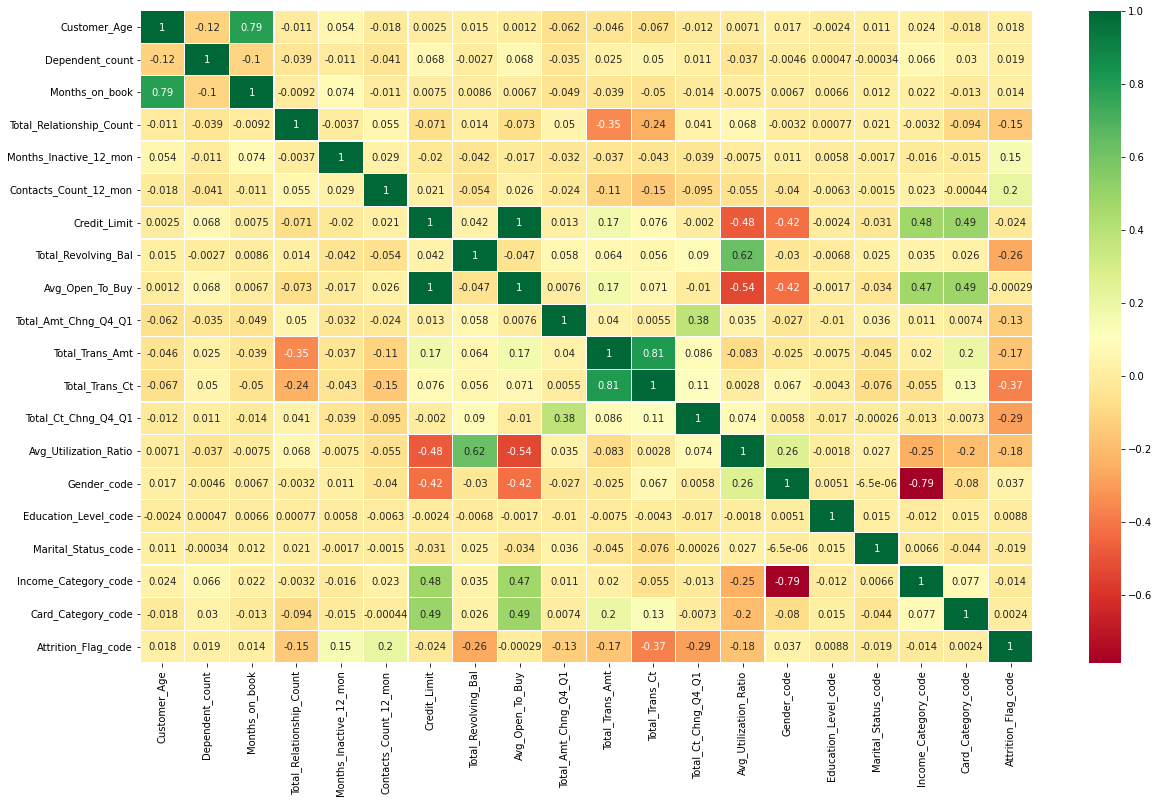

In [ ]:
sns.heatmap(df_alldata.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

#Handling Imbalance data

In [ ]:
pos = df_alldata[df_alldata['Attrition_Flag_code']==1]
neg = df_alldata[df_alldata['Attrition_Flag_code']==0]
print(pos.shape)
print(neg.shape)

# Over-sampling
pos_rand = pos.sample(neg.shape[0],replace = True)  # duplicates randomly *exit.shape[0] - stay.shape[0]* samples
pos_rand.shape

df_alldata = pd.concat([pos_rand,neg],axis =0)

df_alldata['Attrition_Flag_code'].value_counts()

(1627, 20)
(8500, 20)


1    8500
0    8500
Name: Attrition_Flag_code, dtype: int64

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#Split Train Test Data  train test valiation 70% 20% 10%
from sklearn.model_selection import train_test_split
x_all=df_alldata
y_all=df_alldata[['Attrition_Flag_code']]


x_train, x_test, y_train, y_test = train_test_split(df_alldata, df_alldata[['Attrition_Flag_code']],train_size=0.8,stratify=df_alldata[['Attrition_Flag_code']],random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train[['Attrition_Flag_code']],train_size=0.875,stratify=y_train[['Attrition_Flag_code']],random_state=1)


#Explore Train & Test

for x_col in x_train.columns:
    

    fig = px.histogram(x_train, x=x_col, color="Attrition_Flag_code",title="Train")
    fig.show()
    fig = px.histogram(x_test, x=x_col, color="Attrition_Flag_code",title="Test")
    fig.show()
    fig = px.histogram(x_valid, x=x_col, color="Attrition_Flag_code",title="Validate")
    fig.show()


x_train=x_train.drop('Attrition_Flag_code',axis=1)
x_test=x_test.drop('Attrition_Flag_code',axis=1)
x_valid=x_valid.drop('Attrition_Flag_code',axis=1)

In [ ]:
#Normalize data
scaler = StandardScaler()  
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 

In [ ]:
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

#Train and Test Machine Learning Models

In [ ]:
#ML Model

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Extra Trees Ensemble', ExtraTreesClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('MLP', MLPClassifier()))
models.append(('LSVC', LinearSVC()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreeClassifier()))

DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline


best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition','type'])
for i in range(3):
  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred=model.predict(x_test)
      s=accuracy_score(y_test,y_pred) #f1_score(y_test, model.predict(x_test), average='weighted') 

      trainscore=accuracy_score(y_train,model.predict(x_train))
      
      #score =  roc_auc_score(y_train, proba)

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i,'type' :'ML'}
      resultlist=resultlist.append(result, ignore_index = True)
      """
      fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()
      """
      print(  name+ " Accuracy =" + str(s))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))
      
      if trainscore > best_valid:
          best_valid = trainscore
          best_model = model
          best_model_name = name

  print(f"Best model is {best_model_name}")

LDA Accuracy =0.8444117647058823
LDA--- 0.025704622268676758 seconds ---
QDA Accuracy =0.8541176470588235
QDA--- 0.008209705352783203 seconds ---
AdaBoost Accuracy =0.9458823529411765
AdaBoost--- 0.7037456035614014 seconds ---
Bagging Accuracy =0.976764705882353
Bagging--- 1.2852227687835693 seconds ---
Extra Trees Ensemble Accuracy =0.9902941176470588
Extra Trees Ensemble--- 1.1262457370758057 seconds ---
Gradient Boosting Accuracy =0.9623529411764706
Gradient Boosting--- 4.067553520202637 seconds ---
Random Forest Accuracy =0.9864705882352941
Random Forest--- 2.3968443870544434 seconds ---
Ridge Accuracy =0.8444117647058823
Ridge--- 0.009548187255859375 seconds ---
SGD Accuracy =0.8408823529411765
SGD--- 0.08321118354797363 seconds ---
BNB Accuracy =0.803235294117647
BNB--- 0.008597850799560547 seconds ---
GNB Accuracy =0.7958823529411765
GNB--- 0.003968954086303711 seconds ---
KNN Accuracy =0.9144117647058824
KNN--- 0.002451181411743164 seconds ---
LSVC Accuracy =0.8464705882352941


# Compare Machine Learning Result

In [ ]:
# Compare Machine Learning
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())
#fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
#fig.show()


#fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
#fig.show()

#fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
#fig.show()




                       Acc                                              \
                     count      mean           std       min       25%   
model                                                                    
AdaBoost               3.0  0.945882  0.000000e+00  0.945882  0.945882   
BNB                    3.0  0.803235  0.000000e+00  0.803235  0.803235   
Bagging                3.0  0.977353  1.836764e-03  0.975882  0.976324   
DTC                    3.0  0.971961  1.032907e-03  0.970882  0.971471   
ETC                    3.0  0.952647  9.012678e-03  0.942353  0.949412   
Extra Trees Ensemble   3.0  0.989314  1.032907e-03  0.988235  0.988824   
GNB                    3.0  0.795882  0.000000e+00  0.795882  0.795882   
Gradient Boosting      3.0  0.962353  0.000000e+00  0.962353  0.962353   
KNN                    3.0  0.914412  0.000000e+00  0.914412  0.914412   
LDA                    3.0  0.844412  0.000000e+00  0.844412  0.844412   
LSVC                   3.0  0.846471  

# Tune Gradient Boosting Model

In [ ]:
"""
v_max_depth=range(1,15)

best_score=0
best_max_depth=0
for p_max_depth in v_max_depth:
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.00,max_depth=p_max_depth, random_state=0).fit(x_train, y_train)
  s=accuracy_score(y_test,clf.predict(x_test)) #clf.score(x_test, y_test)
  print('max_depth = '+str(p_max_depth)+ "   Acc="+str(s))
  if s>best_score:
    best_score=s
    best_max_depth=p_max_depth
"""

'\nv_max_depth=range(1,15)\n\nbest_score=0\nbest_max_depth=0\nfor p_max_depth in v_max_depth:\n  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.00,max_depth=p_max_depth, random_state=0).fit(x_train, y_train)\n  s=accuracy_score(y_test,clf.predict(x_test)) #clf.score(x_test, y_test)\n  print(\'max_depth = \'+str(p_max_depth)+ "   Acc="+str(s))\n  if s>best_score:\n    best_score=s\n    best_max_depth=p_max_depth\n'

In [ ]:
"""
v_n_estimators=range(100,140,20)

best_score=0
best_n_estimators=0
for p_n_estimators in v_n_estimators:
  clf = GradientBoostingClassifier(n_estimators=p_n_estimators, learning_rate=1.00,max_depth=best_max_depth, random_state=0).fit(x_train, y_train)
  s= accuracy_score(y_test,clf.predict(x_test)) #clf.score(x_test, y_test)
  print('max_depth = '+str(best_max_depth)+'  n_estimator='+str(p_n_estimators)+ "   Acc="+str(s))
  if s>best_score:
    best_score=s
    best_n_estimators=p_n_estimators
"""

'\nv_n_estimators=range(100,140,20)\n\nbest_score=0\nbest_n_estimators=0\nfor p_n_estimators in v_n_estimators:\n  clf = GradientBoostingClassifier(n_estimators=p_n_estimators, learning_rate=1.00,max_depth=best_max_depth, random_state=0).fit(x_train, y_train)\n  s= accuracy_score(y_test,clf.predict(x_test)) #clf.score(x_test, y_test)\n  print(\'max_depth = \'+str(best_max_depth)+\'  n_estimator=\'+str(p_n_estimators)+ "   Acc="+str(s))\n  if s>best_score:\n    best_score=s\n    best_n_estimators=p_n_estimators\n'

In [ ]:
"""
for i in range(3):
  start_time = time.time()
  clf = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=1.00,max_depth=best_max_depth).fit(x_train, y_train)
  s=clf.score(x_test, y_test)
  end_time = time.time()

  result = {'model': 'TunedGradientBoostingClassifier', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i ,'type' :'ML'}
  resultlist=resultlist.append(result, ignore_index = True)
  print(confusion_matrix(y_test,clf.predict(x_test)))
"""

"\nfor i in range(3):\n  start_time = time.time()\n  clf = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=1.00,max_depth=best_max_depth).fit(x_train, y_train)\n  s=clf.score(x_test, y_test)\n  end_time = time.time()\n\n  result = {'model': 'TunedGradientBoostingClassifier', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i ,'type' :'ML'}\n  resultlist=resultlist.append(result, ignore_index = True)\n  print(confusion_matrix(y_test,clf.predict(x_test)))\n"

# Tune ExtraTreesClassifier(n_estimators=1000)

In [ ]:
n_estimator=range(1000,2000,100)

best_score=0
best_n_estimator=0
for n_e in n_estimator:
  clf = ExtraTreesClassifier(n_estimators=n_e).fit(x_train, y_train)
  s=accuracy_score(y_valid,clf.predict(x_valid)) #clf.score(x_test, y_test)
  print('n_estimator = '+str(n_e)+ "   Acc="+str(s))
  if s>best_score:
    best_score=s
    best_n_estimator=n_e



n_estimator = 1000   Acc=0.9923529411764705
n_estimator = 1100   Acc=0.9923529411764705
n_estimator = 1200   Acc=0.991764705882353
n_estimator = 1300   Acc=0.9923529411764705
n_estimator = 1400   Acc=0.9923529411764705
n_estimator = 1500   Acc=0.9923529411764705
n_estimator = 1600   Acc=0.9923529411764705
n_estimator = 1700   Acc=0.9923529411764705
n_estimator = 1800   Acc=0.9935294117647059
n_estimator = 1900   Acc=0.991764705882353


In [ ]:
for i in range(3):
  start_time = time.time()
  clf = ExtraTreesClassifier(n_estimators=best_n_estimator).fit(x_train, y_train)
  s=clf.score(x_test, y_test)
  end_time = time.time()

  result = {'model': 'TunedExtraTreesClassifier', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i ,'type' :'ML'}
  resultlist=resultlist.append(result, ignore_index = True)
  print(confusion_matrix(y_test,clf.predict(x_test)))

[[1673   27]
 [  12 1688]]
[[1676   24]
 [  12 1688]]
[[1675   25]
 [  12 1688]]


# Compare ML Model after tune

In [ ]:
#Compare ML result after tune
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

#fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
#fig.show()


#fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
#fig.show()

#fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
#fig.show()




                            Acc                                              \
                          count      mean           std       min       25%   
model                                                                         
AdaBoost                    3.0  0.945882  0.000000e+00  0.945882  0.945882   
BNB                         3.0  0.803235  0.000000e+00  0.803235  0.803235   
Bagging                     3.0  0.977353  1.836764e-03  0.975882  0.976324   
DTC                         3.0  0.971961  1.032907e-03  0.970882  0.971471   
ETC                         3.0  0.952647  9.012678e-03  0.942353  0.949412   
Extra Trees Ensemble        3.0  0.989314  1.032907e-03  0.988235  0.988824   
GNB                         3.0  0.795882  0.000000e+00  0.795882  0.795882   
Gradient Boosting           3.0  0.962353  0.000000e+00  0.962353  0.962353   
KNN                         3.0  0.914412  0.000000e+00  0.914412  0.914412   
LDA                         3.0  0.844412  0.000000e

# Deep Learning Model

In [ ]:
!nvidia-smi -L
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

np.random.seed(1234)
tf.random.set_seed(5678)

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


#Change data Type

In [ ]:
x_traindp = x_train.astype(np.float32)
x_testdp = x_test.astype(np.float32)
x_validdp = x_valid.astype(np.float32)

y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()
y_validdp = y_valid.to_numpy()

# Create the network architecture

In [ ]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                640       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 6

# Compile the model

In [ ]:
#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

#Train Model

In [ ]:

for i in range(3):
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=128, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  end_time = time.time()

  y_pred = model.predict( x_testdp)
  s=accuracy_score(y_test,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'model': 'DeepLearningSoftMaxAdam', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i ,'type' :'DL'}
  resultlist=resultlist.append(result, ignore_index = True)



Epoch 1/100
66/66 [==============================] - 2s 9ms/step - loss: 0.5576 - acc: 0.7158 - val_loss: 0.5175 - val_acc: 0.7922
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.3861 - acc: 0.8304 - val_loss: 0.3930 - val_acc: 0.8468
Epoch 3/100
66/66 [==============================] - 0s 6ms/step - loss: 0.3270 - acc: 0.8611 - val_loss: 0.3168 - val_acc: 0.8734
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.2964 - acc: 0.8764 - val_loss: 0.2786 - val_acc: 0.8838
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.2744 - acc: 0.8886 - val_loss: 0.2532 - val_acc: 0.8933
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.2558 - acc: 0.8902 - val_loss: 0.2346 - val_acc: 0.9020
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.2416 - acc: 0.9032 - val_loss: 0.2229 - val_acc: 0.9090
Epoch 8/100
66/66 [==============================] - 0s 4ms/step - loss: 0.2221 - a

In [ ]:
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

total 7348
-rw-r--r-- 1 root root 47984 Aug 30 07:34 bestmodel_epoch37_valloss0.14.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:34 bestmodel_epoch03_valloss0.14.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:34 bestmodel_epoch02_valloss0.15.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:34 bestmodel_epoch01_valloss0.14.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:34 bestmodel_epoch90_valloss0.13.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:34 bestmodel_epoch89_valloss0.14.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:34 bestmodel_epoch80_valloss0.14.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:33 bestmodel_epoch37_valloss0.13.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:33 bestmodel_epoch34_valloss0.13.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:33 bestmodel_epoch10_valloss0.13.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:33 bestmodel_epoch03_valloss0.12.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:33 bestmodel_epoch02_valloss0.13.hdf5
-rw-r--r-- 1 root root 47984 Aug 30 07:33 bestmodel_epoch81_vallo

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

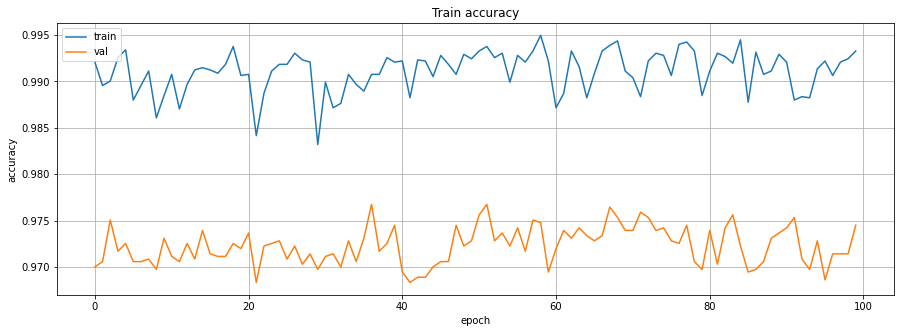

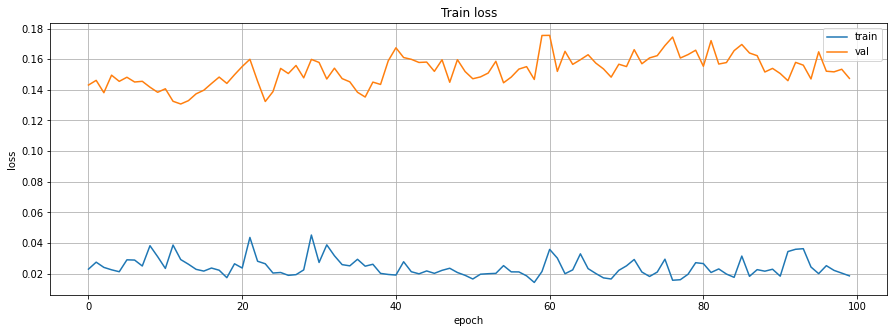

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#Deeplearning softmax optimizer=Adamax

In [ ]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=128, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  end_time = time.time()

  y_pred = model.predict( x_testdp)
  s=accuracy_score(y_test,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'model': 'DeepLearningSoftMaxAdamax', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  resultlist=resultlist.append(result, ignore_index = True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                640       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

#Deeplearning softmax optimizer=Nadam  

In [ ]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=128, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  end_time = time.time()

  y_pred = model.predict( x_testdp)
  s=accuracy_score(y_test,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'model': 'DeepLearningSoftMaxNadam', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  resultlist=resultlist.append(result, ignore_index = True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                640       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

#Evaluate the model on test set

In [ ]:
results = model.evaluate(x_testdp, y_testdp, batch_size=128)
print( f"{model.metrics_names} = {results}" )

27/27 [==============================] - 0s 1ms/step - loss: 0.1447 - acc: 0.9697
['loss', 'acc'] = [0.14473459124565125, 0.9697058796882629]


#Inference

In [ ]:
# Test using the model on x_test[i]
i = 0
y_pred = model.predict( x_testdp[i].reshape(1,-1) )   # reshape x_test[i] from (n_feature,) to (1, n_feature)

print( f"{'#'*10} Input: x_testdp[{i}] {'#'*10}" )
print( f"shape={x_testdp[i].shape}\nvalue={x_testdp[i]}\n" )

print( f"{'#'*10} Ground truth: y_testdp[{i}] {'#'*10}" )
print( f"shape={y_testdp[i].shape}\nvalue={y_testdp[i]}\n" )

print( f"{'#'*10} Prediction: y_pred {'#'*10}" )
print( f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}" )
print( f"value={y_pred}" )
print( f"np.argmax(y_pred)={np.argmax(y_pred)}" )

########## Input: x_testdp[0] ##########
shape=(19,)
value=[-0.19077627  2.0203438  -0.00791857  0.88846177 -0.48929122  0.30830878
 -0.63018763 -0.3070804  -0.5991056  -0.05020504  0.29740614  1.5624347
  0.50337625  0.10904987  0.9125475   1.382986   -2.0501292  -0.71981686
 -0.24273467]

########## Ground truth: y_testdp[0] ##########
shape=(1,)
value=[0]

########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 2)
value=[[1.0000000e+00 8.7556224e-24]]
np.argmax(y_pred)=0


#Compare all ML and DL Models

In [ ]:
#Compare ML result after tune
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

fig = px.scatter(resultlist, x="runtime", y="Acc", color="type",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models',symbol = 'model')
fig.show()


fig = px.box(resultlist, x="model", y="Acc", points="all",title="Acc score for ML model",color="type")
fig.show()

fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model",color="type")
fig.show()

                            Acc                                              \
                          count      mean           std       min       25%   
model                                                                         
AdaBoost                    3.0  0.945882  0.000000e+00  0.945882  0.945882   
BNB                         3.0  0.803235  0.000000e+00  0.803235  0.803235   
Bagging                     3.0  0.977353  1.836764e-03  0.975882  0.976324   
DTC                         3.0  0.971961  1.032907e-03  0.970882  0.971471   
DeepLearningSoftMaxAdam     3.0  0.969314  5.011521e-03  0.963529  0.967794   
DeepLearningSoftMaxAdamax   3.0  0.972745  2.535788e-03  0.970000  0.971618   
DeepLearningSoftMaxNadam    3.0  0.969608  2.207516e-03  0.967353  0.968529   
ETC                         3.0  0.952647  9.012678e-03  0.942353  0.949412   
Extra Trees Ensemble        3.0  0.989314  1.032907e-03  0.988235  0.988824   
GNB                         3.0  0.795882  0.000000e